In [84]:
## 1. Mass image data pre-classification ##
##    1) Category : [57, 113, 227, 228, 229, 455]
##    2) Result : [57: 60, 113: 64, 227~229(=228): 170, 455: 64]

import os
import shutil


def move_files_with_pattern(source_folder, target_folder, pattern):
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
        print(f"Created folder: {target_folder}")
    
    
    for file_name in os.listdir(source_folder):
        if pattern in file_name:
            source_path = os.path.join(source_folder, file_name)
            target_path = os.path.join(target_folder, file_name)
            shutil.move(source_path, target_path)
            print(f"Moved: {file_name} to {target_folder}")

# Image folder paths
source_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\image"  # Before Classification
target_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\228"  # After Classification
pattern = "229.0"  # mass classification target

# Execute
move_files_with_pattern(source_folder, target_folder, pattern)

Moved: LPMS_B_V111_R_B_30.0_229.0_4.8G_240910142214553.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_B_V111_R_B_30.0_229.0_5.9G_240910142136523.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_B_V111_R_B_30.0_229.0_6.0G_240910142206553.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_B_V111_R_B_30.0_229.0_6.2G_240910142210563.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_B_V111_R_B_30.0_229.0_7.4G_240910142218563.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_I_V111_T_B_30.0_229.0_7.4G_240910142358523.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_I_V111_T_B_30.0_229.0_7.6G_240910142344523.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_I_V111_T_B_30.0_229.0_7.7G_240910142318553.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_I_V111_T_B_30.0_229.0_7.7G_240910142333533.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\228
Moved: LPMS_I_V111_T_B_30.0_229.0_8.0G_2409101

In [ ]:
import os
import shutil
import random


def split_dataset(source_folder, train_folder, val_folder, test_folder, train_ratio=0.8, val_ratio=0.1):
    # train, validation, test 폴더 생성
    for folder in [train_folder, val_folder, test_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)
            print(f"Created folder: {folder}")

    # 질량별 폴더 처리
    for mass_folder in os.listdir(source_folder):
        mass_path = os.path.join(source_folder, mass_folder)
        if os.path.isdir(mass_path):  # 질량별 폴더인지 확인
            images = [f for f in os.listdir(mass_path) if os.path.isfile(os.path.join(mass_path, f))]
            random.shuffle(images)  # 이미지를 랜덤으로 섞음

            # 데이터 분할
            train_count = int(len(images) * train_ratio)
            val_count = int(len(images) * val_ratio)
            train_images = images[:train_count] 
            val_images = images[train_count:train_count + val_count]
            test_images = images[train_count + val_count:]

            # Train 데이터 이동 (질량별 폴더 유지)
            target_class_folder = os.path.join(train_folder, mass_folder)
            if not os.path.exists(target_class_folder):
                os.makedirs(target_class_folder)
            for file in train_images:
                src_path = os.path.join(mass_path, file)
                dst_path = os.path.join(target_class_folder, file)
                shutil.move(src_path, dst_path)

            # Validation 데이터 이동 (폴더 없이 섞임)
            for file in val_images:
                src_path = os.path.join(mass_path, file)
                dst_path = os.path.join(val_folder, file)
                shutil.move(src_path, dst_path)

            # Test 데이터 이동 (폴더 없이 섞임)
            for file in test_images:
                src_path = os.path.join(mass_path, file)
                dst_path = os.path.join(test_folder, file)
                shutil.move(src_path, dst_path)

            print(f"Split {mass_folder}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")


# 경로 설정
source_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image"  # 질량별 데이터가 있는 폴더
train_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\train"  # Train 데이터 폴더
val_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\validation"  # Validation 데이터 폴더
test_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\test"  # Test 데이터 폴더

# 함수 실행
split_dataset(source_folder, train_folder, val_folder, test_folder, train_ratio=0.8, val_ratio=0.1)


Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\train
Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\validation
Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\test
Split 113: 51 train, 6 val, 7 test
Split 228: 136 train, 17 val, 17 test
Split 455: 51 train, 6 val, 7 test
Split 57: 48 train, 6 val, 6 test
Split test: 29 train, 3 val, 5 test
Split train: 0 train, 0 val, 0 test
Split validation: 30 train, 3 val, 5 test


In [31]:
import os
import shutil

def organize_validation_images(validation_folder):
    # 질량별 폴더 이름
    mass_folders = ['57', '113', '228', '455']
    
    # 하위 폴더 생성
    for mass in mass_folders:
        target_folder = os.path.join(validation_folder, mass)
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)
            print(f"Created folder: {target_folder}")
    
    # Validation 폴더 내 이미지 파일 분류
    for filename in os.listdir(validation_folder):
        file_path = os.path.join(validation_folder, filename)
        
        # 파일이 이미지인지 확인
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            # 파일명에서 질량 정보 추출
            for mass in mass_folders:
                if f"_{mass}." in filename:  # 파일명에 질량 정보가 포함된 경우
                    target_folder = os.path.join(validation_folder, mass)
                    shutil.move(file_path, os.path.join(target_folder, filename))
                    print(f"Moved: {filename} to {target_folder}")
                    break

# 경로 설정
validation_folder = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\validation"

# 함수 실행
organize_validation_images(validation_folder)

Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\57
Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\113
Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\228
Created folder: C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\455
Moved: LPMS_B_V107_R_B_30.0_228.0_12.8G_240910194505600.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\228
Moved: LPMS_B_V107_R_B_50.0_57.0_10.1G_240910194658580.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\57
Moved: LPMS_B_V107_R_B_50.0_57.0_13.6G_240910194701630.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\57
Moved: LPMS_B_V107_R_B_50.0_57.0_16.3G_240910194708630.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\57
Moved: LPMS_B_V108_R_B_15.0_455.0_5.1G_240910193609610.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\455
Moved: LPMS_B_V108_R_B_15.0_455.0_6.2G_240910193612590.png to C:\Users\SAMSUNG\OneDrive\Desktop\image\validation\455
Moved: LPMS_B_V10

In [ ]:
## Training / Evaluation ##

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
##  3.2. Path setting

train_dir = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\train"
val_dir = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\validation"
test_dir = r"C:\Users\SAMSUNG\OneDrive\Desktop\image\test"
weights_path = "best_model_weights.keras"  # 최고의 가중치 저장 경로

In [40]:
##  3.3. Hyperparameter setting

img_size = (224, 224)  # 입력 이미지 크기
batch_size = 8
epochs = 20
learning_rate = 0.00005

In [41]:
##  3.4. Data load & augmentation

# 데이터 로드
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train 데이터 로드
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # 폴더명을 정답으로 사용
)

# Validation 데이터 로드 (폴더명을 사용하지만, 모델이 이를 학습하지 않도록 설정)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # 레이블을 로드
    shuffle=False  # 순서 고정
)

# Validation 레이블 분리
val_labels = val_generator.classes  # Validation 데이터의 실제 레이블

# Test 데이터 로드 (폴더명을 사용하지 않음)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=1,
    class_mode=None,  # 레이블 없이 로드
    shuffle=False  # 순서 고정
)

# 데이터 확인
print(f"Train Samples: {train_generator.samples}, Classes: {train_generator.class_indices}")
print(f"Validation Samples: {val_generator.samples}, Classes: {val_generator.class_indices}")

Found 286 images belonging to 4 classes.
Found 33 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Train Samples: 286, Classes: {'113': 0, '228': 1, '455': 2, '57': 3}
Validation Samples: 33, Classes: {'113': 0, '228': 1, '455': 2, '57': 3}


In [42]:
# 3.5. Model definition (Transfer Learning)

# 모델 정의 (EfficientNetB0 기반)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Pre-trained 모델 일부 레이어 동결
for layer in base_model.layers[:-50]:
    layer.trainable = False

# 모델 컴파일
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 학습 콜백 설정
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=weights_path,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.3428 - loss: 1.3470
Epoch 1: val_accuracy improved from -inf to 0.48485, saving model to best_model_weights.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 917ms/step - accuracy: 0.3450 - loss: 1.3459 - val_accuracy: 0.4848 - val_loss: 1.3429
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.4572 - loss: 1.3452
Epoch 2: val_accuracy did not improve from 0.48485
36/36 ━━━━━━━━━━━━━━━━━━━━ 38s 913ms/step - accuracy: 0.4574 - loss: 1.3447 - val_accuracy: 0.4848 - val_loss: 1.3206
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.4171 - loss: 1.3611
Epoch 3: val_accuracy did not improve from 0.48485
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 836ms/step - accuracy: 0.4177 - loss: 1.3598 - val_accuracy: 0.4848 - val_loss: 1.3035
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.4548 - loss: 1.3108
Epoch 4: val_accuracy did not improve from 0.48485
36/36 ━━━━━━━━━━━━━━━━━━━━ 37s 878ms/step - accuracy: 0

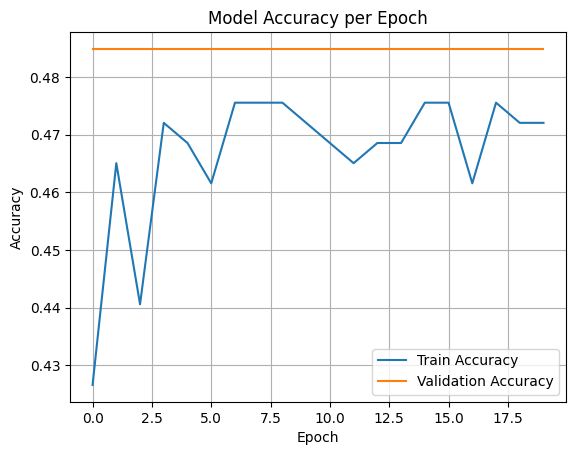

Loaded best model weights.


In [43]:
## 3.6. Training

# 학습
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_cb],
    verbose=1
)

# 학습 및 검증 정확도 시각화
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# 최고 성능 가중치 로드
model.load_weights(weights_path)
print("Loaded best model weights.")